<h1 style="color:blue;">📝 Problem Statement</h1>
<h3 style="color:orange;">Please use Python to answer this question</h3>
In order to improve user retention and lower churn, the growth team at Robinhood is interested in understanding why and which users withdraw money from their Robinhood account. A user is considered churned
when their equity value (amount of maoney in Robinhood account) falls below 10 dollars for a period of 28 consecutive calendar days or longer after having previously been at least 10 dollars

---

<h3 style="color:blue;">📊 Using the datasets given below, answer the following questions:</h3>
<h4 style="color:orange;">a) What percentage of users have churned in the data provided? </h4>
**[4 points]**

---

<h4 style="color:orange;">b) Build a classifier that, given a user with their features, assigns a churn probability for every user and predicts which users will churn. </h4>

- How well does your classifier perform?
- State any metrics you deem important here.
- Based on the classifier output, classify each user in the dataset as churned or not churned.
**[5 points]**

---
  
<h4 style="color:orange;">c) List the most important features that correlate to user churn. </h4>
**[3 points]**

---
👉 Please provide the code and any explanation of your assumptions and methodology.

<h4 style="color:orange;">Import Libraries</h3>

In [577]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

<h4 style="color:orange;">Simple function to handle heading display</h3>

In [578]:
#function handler to neat heading display
def heading(title):
  print(Fore.RED + '-'*50)
  print(Fore.BLUE + title.upper())
  print(Fore.RED + '-'*50)
  print(Fore.GREEN)

<h4 style="color:orange;">Load the Equity Value Data</h3>

In [579]:
heading('Loading the equity data to a pandas dataframe')
equity_df = pd.read_csv('equity_value_data.csv')
equity_df.head(10)

--------------------------------------------------
LOADING THE EQUITY DATA TO A PANDAS DATAFRAME
--------------------------------------------------



,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
5,2016-11-23T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
6,2016-11-25T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
7,2016-11-28T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
8,2016-11-29T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
9,2016-11-30T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


In [580]:
heading('Data Shape Information')
print('Number of rows: ', equity_df.shape[0])
print('Number of columns: ', equity_df.shape[1])

--------------------------------------------------
DATA SHAPE INFORMATION
--------------------------------------------------

Number of rows:  1119158
Number of columns:  3


In [581]:
heading('Equity Data Information')
equity_df.info()

--------------------------------------------------
EQUITY DATA INFORMATION
--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119158 entries, 0 to 1119157
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   timestamp     1119158 non-null  object 
 1   close_equity  1119158 non-null  float64
 2   user_id       1119158 non-null  object 
dtypes: float64(1), object(2)
memory usage: 25.6+ MB


In [582]:
heading('Checking for missing data')
equity_df.isnull().sum()

--------------------------------------------------
CHECKING FOR MISSING DATA
--------------------------------------------------



timestamp       0
close_equity    0
user_id         0
dtype: int64

In [583]:
heading('Checking for count of unique values')
equity_df.nunique()

--------------------------------------------------
CHECKING FOR COUNT OF UNIQUE VALUES
--------------------------------------------------



timestamp          255
close_equity    531483
user_id           5584
dtype: int64

In [584]:
heading('Converting timestamp to datetime')
equity_df['timestamp'] = pd.to_datetime(equity_df['timestamp'])
equity_df.info()

--------------------------------------------------
CONVERTING TIMESTAMP TO DATETIME
--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119158 entries, 0 to 1119157
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   timestamp     1119158 non-null  datetime64[ns, UTC]
 1   close_equity  1119158 non-null  float64            
 2   user_id       1119158 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 25.6+ MB


<h3 style="color:orange;">A) What percentage of users have churned in the data provided?</h3>

In [585]:
heading('Sort the dataframe by user_id and timestamp')
equity_df = equity_df.sort_values(by=['user_id', 'timestamp'])
equity_df.head(10)

--------------------------------------------------
SORT THE DATAFRAME BY USER_ID AND TIMESTAMP
--------------------------------------------------



,timestamp,close_equity,user_id
505994,2016-08-18 00:00:00+00:00,1211.6055,0012db34aa7b083f5714e7831195e54d
505995,2016-08-19 00:00:00+00:00,1173.5640,0012db34aa7b083f5714e7831195e54d
505996,2016-08-22 00:00:00+00:00,1253.0597,0012db34aa7b083f5714e7831195e54d
505997,2016-08-23 00:00:00+00:00,1252.9050,0012db34aa7b083f5714e7831195e54d
505998,2016-08-24 00:00:00+00:00,1262.1360,0012db34aa7b083f5714e7831195e54d
505999,2016-08-25 00:00:00+00:00,1226.4250,0012db34aa7b083f5714e7831195e54d
506000,2016-08-26 00:00:00+00:00,1227.9610,0012db34aa7b083f5714e7831195e54d
506001,2016-08-29 00:00:00+00:00,1250.9700,0012db34aa7b083f5714e7831195e54d
506002,2016-08-30 00:00:00+00:00,1248.1000,0012db34aa7b083f5714e7831195e54d
506003,2016-08-31 00:00:00+00:00,1241.5560,0012db34aa7b083f5714e7831195e54d


<h4 style="color:orange;">Calculating the gap in days and assigning to new column</h4>

In [586]:
heading('Calculate the gap in days between each timestamp')
# equity_df['gap_days'] = equity_df.groupby('user_id')['timestamp'].diff()
# equity_df.head(5)

# Calculate gaps between consecutive logins per user
equity_df["prev_timestamp"] = equity_df.groupby("user_id")["timestamp"].shift()
equity_df["prev_timestamp"] = equity_df["prev_timestamp"].fillna(equity_df["timestamp"])
equity_df["gap_days"] = (equity_df["timestamp"] - equity_df["prev_timestamp"]).dt.days
equity_df.head(5)


--------------------------------------------------
CALCULATE THE GAP IN DAYS BETWEEN EACH TIMESTAMP
--------------------------------------------------



,timestamp,close_equity,user_id,prev_timestamp,gap_days
505994,2016-08-18 00:00:00+00:00,1211.6055,0012db34aa7b083f5714e7831195e54d,2016-08-18 00:00:00+00:00,0
505995,2016-08-19 00:00:00+00:00,1173.5640,0012db34aa7b083f5714e7831195e54d,2016-08-18 00:00:00+00:00,1
505996,2016-08-22 00:00:00+00:00,1253.0597,0012db34aa7b083f5714e7831195e54d,2016-08-19 00:00:00+00:00,3
505997,2016-08-23 00:00:00+00:00,1252.9050,0012db34aa7b083f5714e7831195e54d,2016-08-22 00:00:00+00:00,1
505998,2016-08-24 00:00:00+00:00,1262.1360,0012db34aa7b083f5714e7831195e54d,2016-08-23 00:00:00+00:00,1


In [587]:
# heading('Converting gap_days to timedelta')
# equity_df['gap_days'] = pd.to_timedelta(equity_df['gap_days'])
# equity_df.info()



# # Count churned users
# churned_users = df[df["churned"]]["user_id"].nunique()
# total_users = df["user_id"].nunique()
# churn_ratio = churned_users / total_users * 100

# # Users who churned more than once
# multi_churn_users = df[df["churned"]].groupby("user_id").size()
# multi_churn_users = multi_churn_users[multi_churn_users > 1]

# # Average gap before churn
# avg_churn_gap = df[df["churned"]]["gap_days"].mean()

# # Average gap per user
# user_ave_gap = df[df['gap_days'] < 28].groupby('user_id')['gap_days'].mean().reset_index()
# user_ave_gap.rename(columns={'gap_days': 'avg_gap_before_churn'}, inplace=True)

# # Output results
# print(f"Total users: {total_users}")
# print(f"Churned users: {churned_users}")
# print(f"Churn rate: {churn_ratio:.2f}%")
# print(f"Users with multiple churn events: {len(multi_churn_users)}")
# print(f"Average gap before churn: {avg_churn_gap:.2f} days")
# #print(f"Average gap day per user: {user_ave_gap:.2f} days")

In [588]:
# Mark churn if gap is 28 days or more
equity_df["churned"] = equity_df["gap_days"] >= 28
equity_df.head(10)

,timestamp,close_equity,user_id,prev_timestamp,gap_days,churned
505994,2016-08-18 00:00:00+00:00,1211.6055,0012db34aa7b083f5714e7831195e54d,2016-08-18 00:00:00+00:00,0,False
505995,2016-08-19 00:00:00+00:00,1173.5640,0012db34aa7b083f5714e7831195e54d,2016-08-18 00:00:00+00:00,1,False
505996,2016-08-22 00:00:00+00:00,1253.0597,0012db34aa7b083f5714e7831195e54d,2016-08-19 00:00:00+00:00,3,False
505997,2016-08-23 00:00:00+00:00,1252.9050,0012db34aa7b083f5714e7831195e54d,2016-08-22 00:00:00+00:00,1,False
505998,2016-08-24 00:00:00+00:00,1262.1360,0012db34aa7b083f5714e7831195e54d,2016-08-23 00:00:00+00:00,1,False
505999,2016-08-25 00:00:00+00:00,1226.4250,0012db34aa7b083f5714e7831195e54d,2016-08-24 00:00:00+00:00,1,False
506000,2016-08-26 00:00:00+00:00,1227.9610,0012db34aa7b083f5714e7831195e54d,2016-08-25 00:00:00+00:00,1,False
506001,2016-08-29 00:00:00+00:00,1250.9700,0012db34aa7b083f5714e7831195e54d,2016-08-26 00:00:00+00:00,3,False
506002,2016-08-30 00:00:00+00:00,1248.1000,0012db34aa7b083f5714e7831195e54d,2016-08-29 00:00:00+00:00,1,False
506003,2016-08-31 00:00:00+00:00,1241.5560,0012db34aa7b083f5714e7831195e54d,2016-08-30 00:00:00+00:00,1,False


In [589]:
heading('Total # users who have not logged > than 28 days')
# churned_user_ids = equity_df[equity_df['gap_days'] >= pd.Timedelta('28 days')]['user_id'].unique()

churned_user_ids = equity_df[equity_df["churned"]]["user_id"].nunique()
print(f"Churned users: {churned_users}")


--------------------------------------------------
TOTAL # USERS WHO HAVE NOT LOGGED > THAN 28 DAYS
--------------------------------------------------

Churned users: 279


In [590]:
# heading('Total # users who have not logged > than 28 days')
# num_churned_users_id = equity_df[equity_df['gap_days'] >= pd.Timedelta('28 days')]['user_id'].nunique()
# print(num_churned_users_id)

In [591]:
total_unique_user_ids = equity_df['user_id'].nunique()
heading('Total # unique user_ids')
print(total_unique_user_ids)

--------------------------------------------------
TOTAL # UNIQUE USER_IDS
--------------------------------------------------

5584


In [592]:
heading('Getting percentage of churned user')
# percentage_churned_users = np.round( (num_churned_users_id)/total_unique_user_ids * 100, decimals = 2)
# print('Percentage of churned users = {0}%'.format(percentage_churned_users))

churn_ratio = churned_users / total_users * 100
print('Percentage of churned users = {0}%'.format(churn_ratio))

--------------------------------------------------
GETTING PERCENTAGE OF CHURNED USER
--------------------------------------------------

Percentage of churned users = 4.9964183381088825%


<h4 style="color:red;">B) Build a classifier that, given a user with their features, assigns a churn probability for every user and predicts which users will churn.</h3>

In [593]:
heading('Loading the feature data to a pandas dataframe')
features_df = pd.read_csv('features_data.csv')
features_df.head(10)

--------------------------------------------------
LOADING THE FEATURE DATA TO A PANDAS DATAFRAME
--------------------------------------------------



,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,0322b1d744cc89ebbe6ebe70d824d922
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,f4cac8c1544b723ddedc9bdba81c64c0
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,short_time_horizon,bdc39d2fc664ef9a5e6713168057f892
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,short_time_horizon,85f2f0f54411b4f3e7a403ba902e7280
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,529ddd19dac72d55cde8e633340a9aed


In [594]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   object 
 1   investment_experience         5584 non-null   object 
 2   liquidity_needs               5584 non-null   object 
 3   platform                      5584 non-null   object 
 4   time_spent                    5584 non-null   float64
 5   instrument_type_first_traded  5584 non-null   object 
 6   first_deposit_amount          5584 non-null   float64
 7   time_horizon                  5584 non-null   object 
 8   user_id                       5584 non-null   object 
dtypes: float64(2), object(7)
memory usage: 392.8+ KB


In [595]:
heading('Checking for missing data')
features_df.isnull().sum()

--------------------------------------------------
CHECKING FOR MISSING DATA
--------------------------------------------------



risk_tolerance                  0
investment_experience           0
liquidity_needs                 0
platform                        0
time_spent                      0
instrument_type_first_traded    0
first_deposit_amount            0
time_horizon                    0
user_id                         0
dtype: int64

In [596]:
heading('Shape of feature data')
features_df.shape

--------------------------------------------------
SHAPE OF FEATURE DATA
--------------------------------------------------



(5584, 9)

In [597]:
### Creating a churned dataframe
heading('Creating a churned dataframe')
# churned_df = pd.DataFrame(churned_user_ids, columns = ['user_id'])
# churned_df['churned'] = 1
# churned_df.head(10)


churned_df = pd.DataFrame(equity_df[equity_df['churned'] == True]['user_id'].unique(), columns= ['user_id'])
churned_df['churned'] = 1
churned_df.head(10)

--------------------------------------------------
CREATING A CHURNED DATAFRAME
--------------------------------------------------



,user_id,churned
0,00440034cc4152bfb01b30f5c381c4e3,1
1,005d630a68b4ab3a2f4cd49d9a87c50d,1
2,028367ff3cbcc04c2afc2ce3336c00e2,1
3,0423b88554cedaa7efd8dd4c81774cce,1
4,062ea0ff3b7fc36ae471968aced1f4a1,1
5,06791cf0a732f1713f9f000b18379e29,1
6,06b894b1cc7bb832284efa097c122e2a,1
7,06d8d807c4752e58a570eb1f0eb45457,1
8,08dcfa90e0fee20f81520d54b57699d3,1
9,094b17a44df22e2fcaca13375228693c,1


In [598]:
heading('Merging a churned data and feature data')
churned_df = features_df.merge(churned_df, how = 'left', on = 'user_id').fillna(0)
churned_df.head(10)

--------------------------------------------------
MERGING A CHURNED DATA AND FEATURE DATA
--------------------------------------------------



,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churned
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,0.0
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0.0
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,0.0
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0.0
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,0.0
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,0322b1d744cc89ebbe6ebe70d824d922,0.0
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,f4cac8c1544b723ddedc9bdba81c64c0,1.0
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,short_time_horizon,bdc39d2fc664ef9a5e6713168057f892,0.0
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,short_time_horizon,85f2f0f54411b4f3e7a403ba902e7280,0.0
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,529ddd19dac72d55cde8e633340a9aed,0.0


In [599]:
heading('Convert churned datatype to int')
churned_df['churned'] = churned_df['churned'].astype(int)
churned_df.head(10)

--------------------------------------------------
CONVERT CHURNED DATATYPE TO INT
--------------------------------------------------



,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churned
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,0
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,0
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,0
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,0322b1d744cc89ebbe6ebe70d824d922,0
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,f4cac8c1544b723ddedc9bdba81c64c0,1
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,short_time_horizon,bdc39d2fc664ef9a5e6713168057f892,0
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,short_time_horizon,85f2f0f54411b4f3e7a403ba902e7280,0
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,529ddd19dac72d55cde8e633340a9aed,0


<h4 style="color:orange;">churned_df: Exploratory Data Analysis</h4>

In [600]:
heading('Statistical Details of the Categorical Features')
churned_df.describe(include='object').transpose()

--------------------------------------------------
STATISTICAL DETAILS OF THE CATEGORICAL FEATURES
--------------------------------------------------



,count,unique,top,freq
risk_tolerance,5584,3,high_risk_tolerance,3566
investment_experience,5584,4,limited_investment_exp,2578
liquidity_needs,5584,3,very_important_liq_need,4217
platform,5584,3,iOS,3550
instrument_type_first_traded,5584,11,stock,4827
time_horizon,5584,3,short_time_horizon,2833
user_id,5584,5584,895044c23edc821881e87da749c01034,1


In [601]:
heading('Statistical Details of the Numeric Features')
churned_df.drop(columns=['user_id']).describe().transpose().style.background_gradient(cmap='Blues')

--------------------------------------------------
STATISTICAL DETAILS OF THE NUMERIC FEATURES
--------------------------------------------------



,count,mean,std,min,25%,50%,75%,max
time_spent,5584.000000,34.509706,155.080551,0.000000,2.848908,13.474708,33.823829,8788.329450
first_deposit_amount,5584.000000,633.566805,2118.323263,0.000000,50.000000,100.000000,500.000000,50000.000000
churned,5584.000000,0.049964,0.217890,0.000000,0.000000,0.000000,0.000000,1.000000


<h4 style="color:orange;">churned_df: Data Visualization</h4>

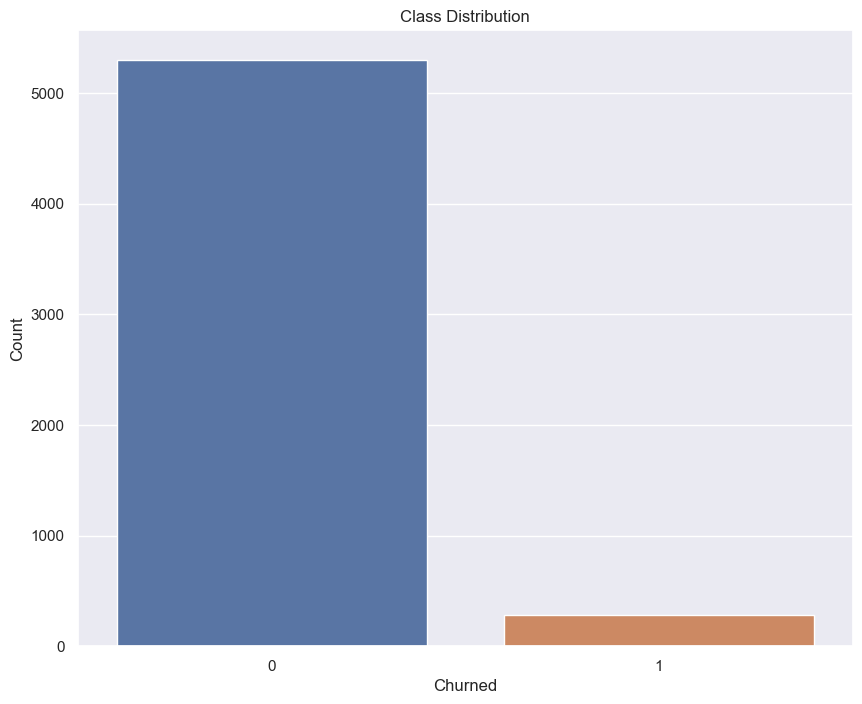

In [602]:
sns.set(rc={'figure.figsize':(10,8)})
fig = sns.countplot(x='churned',data=churned_df)
plt.xlabel("Churned")
plt.ylabel("Count")
plt.title("Class Distribution") 
plt.show(fig)

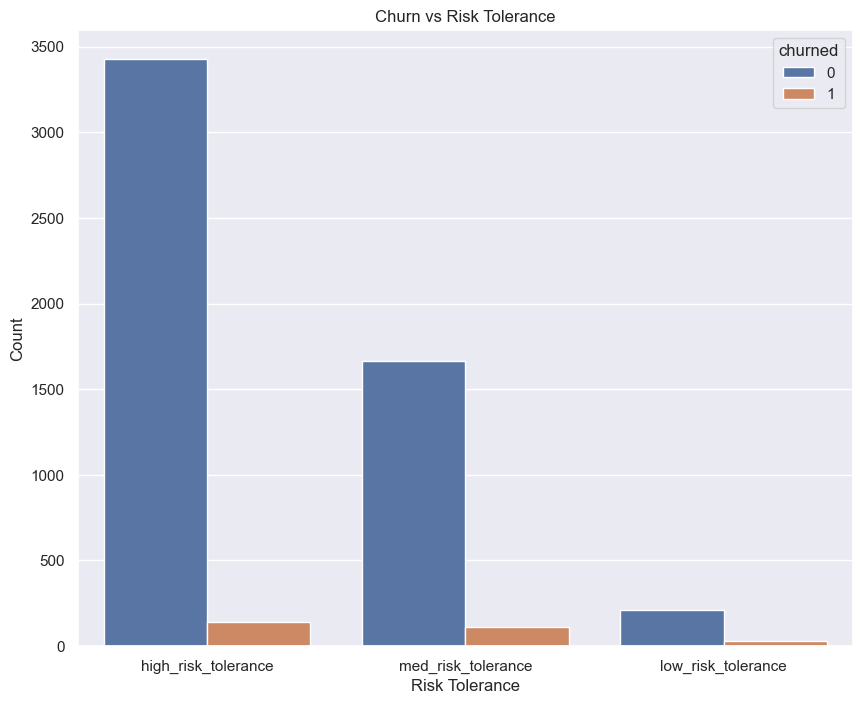

In [603]:
sns.set(rc={'figure.figsize':(10,8)})
fig = sns.countplot(x='risk_tolerance',hue='churned',data=churned_df)
plt.xlabel("Risk Tolerance")
plt.ylabel("Count")
plt.title("Churn vs Risk Tolerance") 
plt.show(fig)

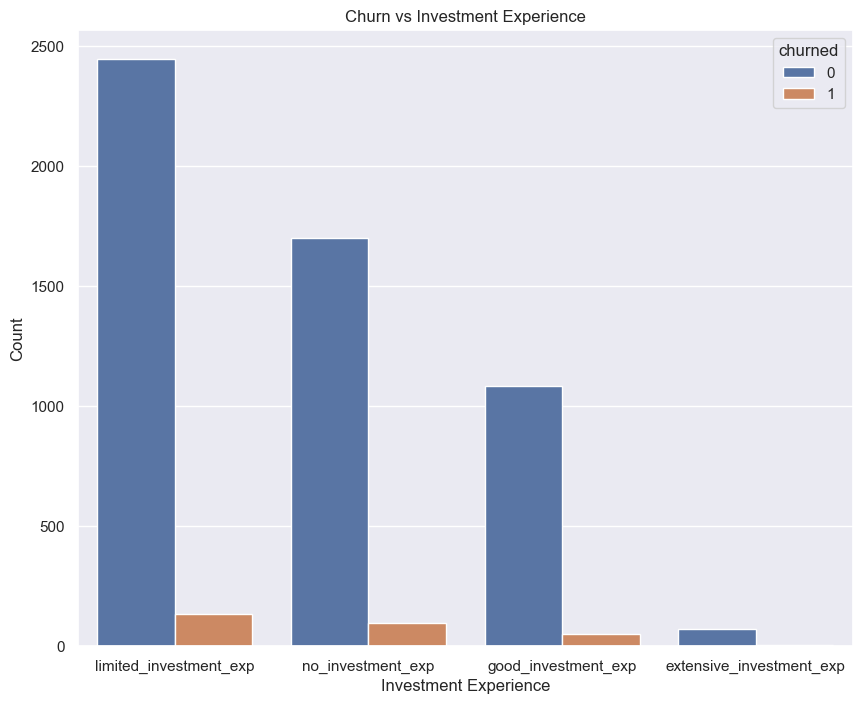

In [604]:
sns.set(rc={'figure.figsize':(10,8)})
fig = sns.countplot(x='investment_experience',hue='churned',data=churned_df)
plt.xlabel("Investment Experience")
plt.ylabel("Count")
plt.title("Churn vs Investment Experience") 
plt.show(fig)

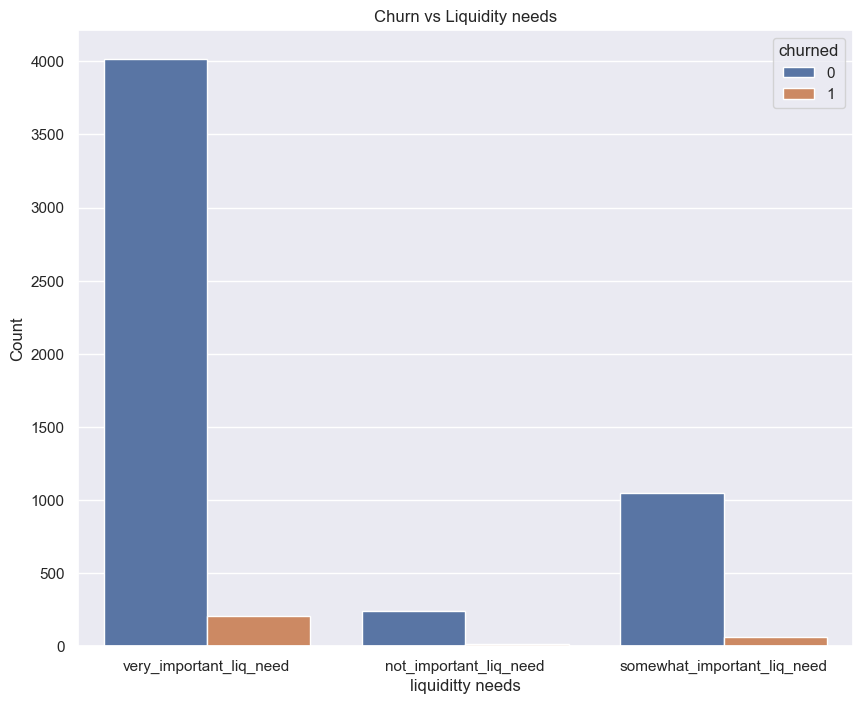

In [605]:
sns.set(rc={'figure.figsize':(10,8)})
fig = sns.countplot(x='liquidity_needs',hue='churned',data=churned_df)
plt.xlabel("liquiditty needs")
plt.ylabel("Count")
plt.title("Churn vs Liquidity needs") 
plt.show(fig)

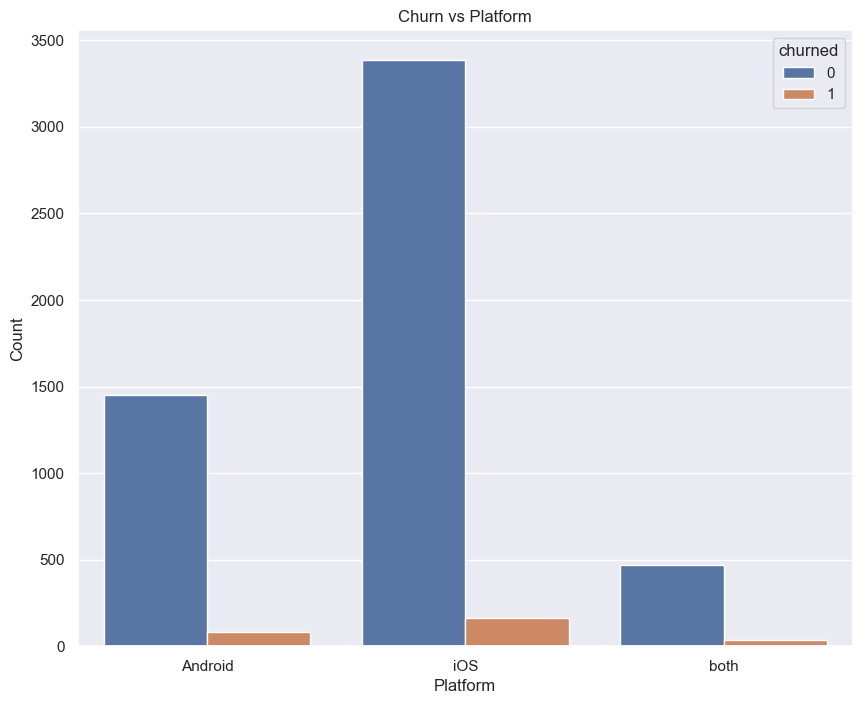

In [606]:
sns.set(rc={'figure.figsize':(10,8)})
fig = sns.countplot(x='platform',hue='churned',data=churned_df)
plt.xlabel("Platform")
plt.ylabel("Count")
plt.title("Churn vs Platform") 
plt.show(fig)

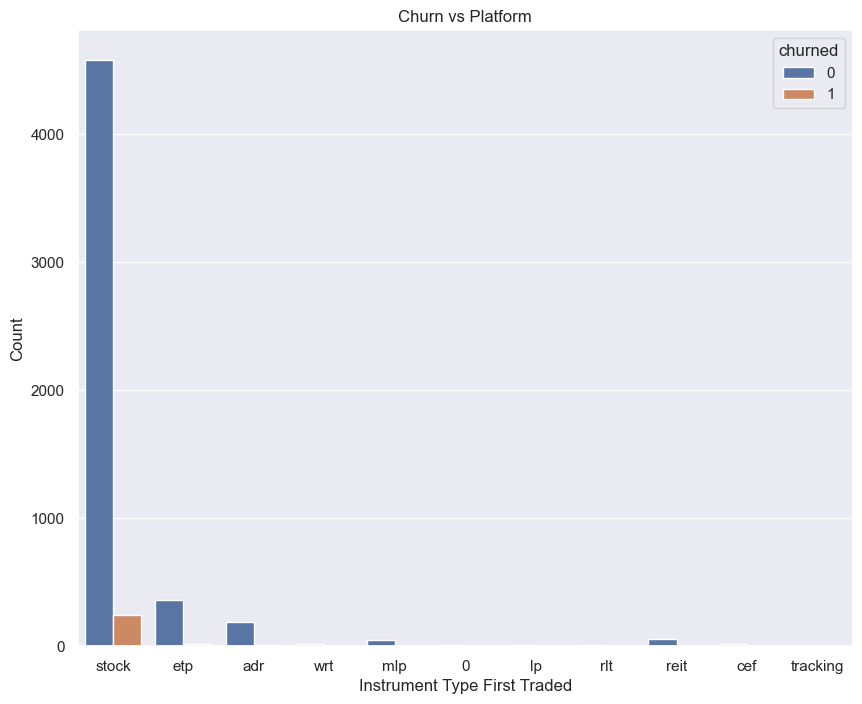

In [607]:
sns.set(rc={'figure.figsize':(10,8)})
fig = sns.countplot(x='instrument_type_first_traded',hue='churned',data=churned_df)
plt.xlabel("Instrument Type First Traded")
plt.ylabel("Count")
plt.title("Churn vs Platform") 
plt.show(fig)

In [608]:
rt_ratio = churned_df.groupby('risk_tolerance')['churned'].mean().reset_index(name='churn_ratio')
heading('Churn Ratio of Risk Tolerance')
rt_ratio

--------------------------------------------------
CHURN RATIO OF RISK TOLERANCE
--------------------------------------------------



,risk_tolerance,churn_ratio
0,high_risk_tolerance,0.039260
1,low_risk_tolerance,0.112971
2,med_risk_tolerance,0.062957


In [609]:
investExp_ratio = churned_df.groupby('investment_experience')['churned'].mean().reset_index(name='churn_ratio')
heading('Churn Ratio of Investment Experience')
investExp_ratio

--------------------------------------------------
CHURN RATIO OF INVESTMENT EXPERIENCE
--------------------------------------------------



,investment_experience,churn_ratio
0,extensive_investment_exp,0.039474
1,good_investment_exp,0.044092
2,limited_investment_exp,0.051202
3,no_investment_exp,0.052339


In [610]:
liquidityNeeds_ratio = churned_df.groupby('liquidity_needs')['churned'].mean().reset_index(name='churn_ratio')
heading('Churn Ratio of Liquidity Needs')
liquidityNeeds_ratio

--------------------------------------------------
CHURN RATIO OF LIQUIDITY NEEDS
--------------------------------------------------



,liquidity_needs,churn_ratio
0,not_important_liq_need,0.062016
1,somewhat_important_liq_need,0.054103
2,very_important_liq_need,0.048138


In [611]:
platform_ratio = churned_df.groupby('platform')['churned'].mean().reset_index(name='churn_ratio')
heading('Churn Ratio of Platform')
platform_ratio

--------------------------------------------------
CHURN RATIO OF PLATFORM
--------------------------------------------------



,platform,churn_ratio
0,Android,0.052322
1,both,0.073267
2,iOS,0.045634


In [612]:
instrumenttype_ratio = churned_df.groupby('instrument_type_first_traded')['churned'].mean().reset_index(name='churn_ratio')
heading('Churn Ratio of Intrument Type First Traded')
instrumenttype_ratio

--------------------------------------------------
CHURN RATIO OF INTRUMENT TYPE FIRST TRADED
--------------------------------------------------



,instrument_type_first_traded,churn_ratio
0,0,0.076923
1,adr,0.045685
2,cef,0.050000
3,etp,0.049608
4,lp,0.125000
5,mlp,0.054545
6,reit,0.018182
7,rlt,0.000000
8,stock,0.050135
9,tracking,0.000000


<h3 style="color:red;">Observations for the non numeric features.</h3>

1. Users with high-risk tolerance are more likely to churn.
2. Users with limited to no investment experience tend to churn as compared to users with extensive investment experience
3. Users with high liquidity needs are more likely to churn
4. Users uisng iOS platform churned more compared to Android users.
5. Users who invest in stocks are highly likely to churn

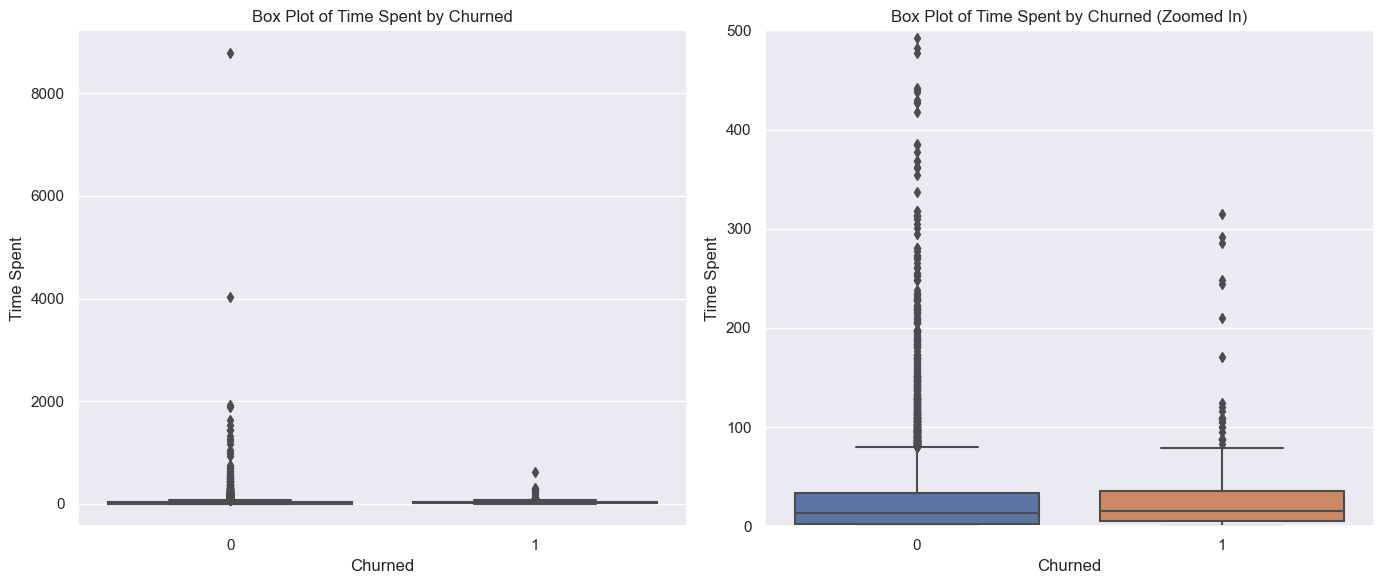

In [613]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='churned', y='time_spent', data=churned_df)
axes[0].set_title('Box Plot of Time Spent by Churned')
axes[0].set_xlabel('Churned')
axes[0].set_ylabel('Time Spent')

sns.boxplot(ax=axes[1], x="churned", y="time_spent", data=churned_df)
axes[1].set_ylim(0, 500)
axes[1].set_title('Box Plot of Time Spent by Churned (Zoomed In)')
axes[1].set_xlabel('Churned')
axes[1].set_ylabel('Time Spent')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Time Spent')

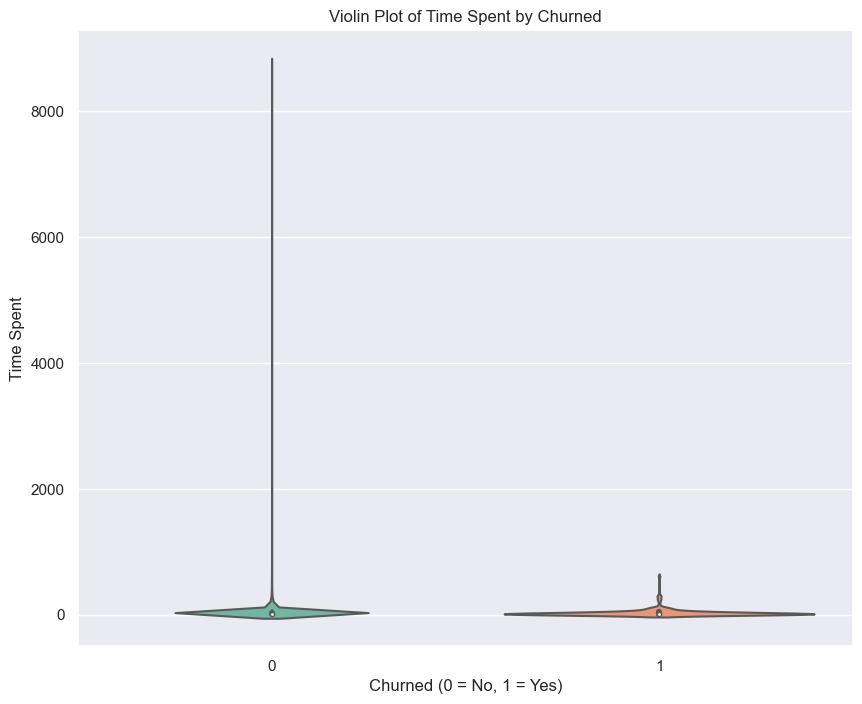

In [614]:
sns.violinplot(x="churned", y="time_spent", data=churned_df, palette="Set2")
plt.title("Violin Plot of Time Spent by Churned")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Time Spent")

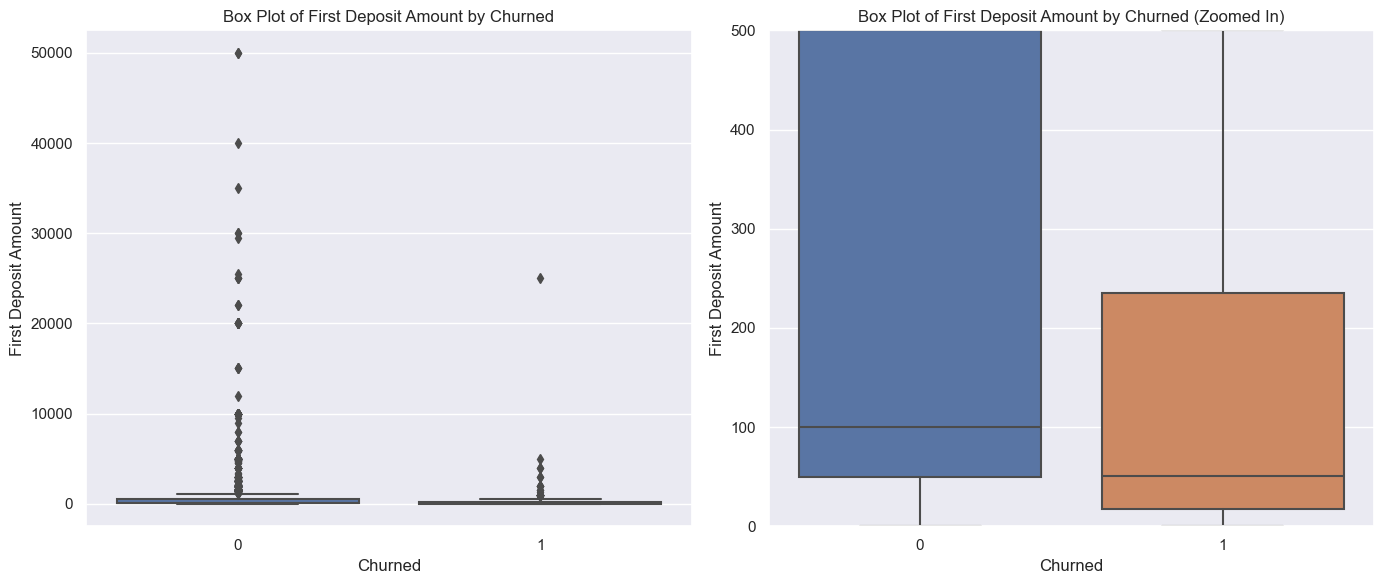

In [615]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='churned', y='first_deposit_amount', data=churned_df)
axes[0].set_title('Box Plot of First Deposit Amount by Churned')
axes[0].set_xlabel('Churned')
axes[0].set_ylabel('First Deposit Amount')

sns.boxplot(ax=axes[1], x="churned", y="first_deposit_amount", data=churned_df)
axes[1].set_ylim(0, 500)
axes[1].set_title('Box Plot of First Deposit Amount by Churned (Zoomed In)')
axes[1].set_xlabel('Churned')
axes[1].set_ylabel('First Deposit Amount')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'First Deposit Amount')

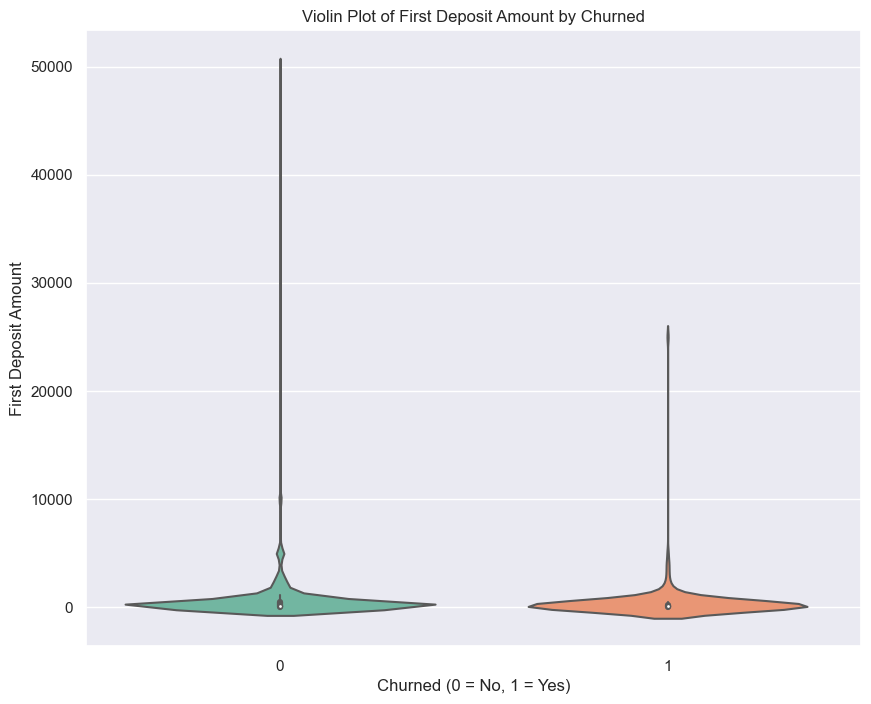

In [616]:
sns.violinplot(x="churned", y="first_deposit_amount", data=churned_df, palette="Set2")
plt.title("Violin Plot of First Deposit Amount by Churned")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("First Deposit Amount")

<h4 style="color:red;">Observations for the Numeric Features</h4>

**Time Spent**  
1. There are visible outliers in both the churned and non-churned groups.
2. However, there are more extreme outliers in the non-churned group.
3. The median values for both groups are nearly the same level.
4. Churned users spent less time compared to non-chd ned.upoup.

**First Deposit Amount**
1. There are visible outliers in both the churned and non-churned groups.
2. The median level for the not churned is slightly higher than the churned group.

<h4 style="color:orange;">Trained Test Split</h4>

In [617]:
from sklearn.model_selection import train_test_split

X = churned_df.drop(['churned','user_id'], axis=1)
y = churned_df['churned']

In [618]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4 style="color:orange;">Perform Log Transformation</h4>

In [619]:
from sklearn.preprocessing import FunctionTransformer

numeric_col = ['first_deposit_amount', 'time_spent']
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_train_log_transformed = X_train.copy()
X_test_log_transformed = X_test.copy()

X_train_log_transformed[numeric_col] = log_transformer.fit_transform(X_train[numeric_col])
X_test_log_transformed[numeric_col] = log_transformer.transform(X_test[numeric_col])

<h4 style="color:orange;">One Hot Encoding</h4>

In [620]:
categorical_columns = [
    'risk_tolerance',
    'investment_experience',
    'liquidity_needs',
    'platform',
    'instrument_type_first_traded',
    'time_horizon'
]

X_train_dummies = pd.get_dummies(X_train_log_transformed, columns=categorical_columns, drop_first=True)
X_test_dummies = pd.get_dummies(X_test_log_transformed, columns=categorical_columns, drop_first=True)

X_train_final, X_test_final = X_train_dummies.align(X_test_dummies, join='left', axis=1, fill_value=0)

<h3 style="color:orange;">Building a Classifier</h>
<h4 style="color:blue;">Cat Boost Classifier</h4>

In [621]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [622]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    cat_features=categorical_features,
    verbose=100,
    random_seed=42
)

cat_model.fit(X_train, y_train, cat_features=categorical_features)
preds = cat_model.predict(X_test)

0:	total: 53.5ms	remaining: 26.7s
100:	total: 4.4s	remaining: 17.4s
200:	total: 8.81s	remaining: 13.1s
300:	total: 14.1s	remaining: 9.3s
400:	total: 19.2s	remaining: 4.73s
499:	total: 24.3s	remaining: 0us


In [623]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score

print(classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1054
           1       0.00      0.00      0.00        63

    accuracy                           0.94      1117
   macro avg       0.47      0.50      0.49      1117
weighted avg       0.89      0.94      0.92      1117



C:\Users\cmmap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmmap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmmap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h4 style="color:blue;">Random Forest Classifier</h4>

In [624]:
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_train_final, y_train)
predictions = rf.predict(X_test_final)
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1054
           1       0.00      0.00      0.00        63

    accuracy                           0.93      1117
   macro avg       0.47      0.49      0.48      1117
weighted avg       0.89      0.93      0.91      1117



<h4 style="color:blue;">Using SMOTE</h4>

In [625]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [626]:
predictions = rf.predict(X_test_final)
print(classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1054
           1       0.00      0.00      0.00        63

    accuracy                           0.94      1117
   macro avg       0.47      0.50      0.49      1117
weighted avg       0.89      0.94      0.92      1117



C:\Users\cmmap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmmap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cmmap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [627]:
proba = rf.predict_proba(X_test_final)[:, 1]
preds = (proba >= 0.3).astype(int) 
print(classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1054
           1       0.07      0.19      0.11        63

    accuracy                           0.82      1117
   macro avg       0.51      0.52      0.50      1117
weighted avg       0.90      0.82      0.86      1117



<h4 style="color:blue;">Feature Engineering Ideas</h4>

1. Number of times the user churned
2. Average gap before churned
3. Investment commitment score (first_deposit_amount * time_horizon)
<!-- 4. Engagement (time_spent * platform) -->

<h4 style="color:orange;">1. Number of times the user churned</h4>

In [628]:
heading('Getting User Churned Multiple times')
multi_churn_users = equity_df[equity_df["churned"]].groupby("user_id").size().reset_index(name="num_of_times_churned")
multi_churn_users.head(10)
# multi_churn_users = multi_churn_users[multi_churn_users > 1].reset_index()

--------------------------------------------------
GETTING USER CHURNED MULTIPLE TIMES
--------------------------------------------------



,user_id,num_of_times_churned
0,00440034cc4152bfb01b30f5c381c4e3,1
1,005d630a68b4ab3a2f4cd49d9a87c50d,1
2,028367ff3cbcc04c2afc2ce3336c00e2,2
3,0423b88554cedaa7efd8dd4c81774cce,2
4,062ea0ff3b7fc36ae471968aced1f4a1,1
5,06791cf0a732f1713f9f000b18379e29,1
6,06b894b1cc7bb832284efa097c122e2a,1
7,06d8d807c4752e58a570eb1f0eb45457,1
8,08dcfa90e0fee20f81520d54b57699d3,1
9,094b17a44df22e2fcaca13375228693c,1


<h4 style="color:orange;">2. Average gap before churned</h4>

In [629]:
heading('Average gap per user before churning')
user_ave_gap = equity_df[equity_df['gap_days'] < 28].groupby('user_id')['gap_days'].mean().reset_index()
user_ave_gap.rename(columns={'gap_days': 'avg_gap_before_churn'}, inplace=True)
user_ave_gap.head(10)

--------------------------------------------------
AVERAGE GAP PER USER BEFORE CHURNING
--------------------------------------------------



,user_id,avg_gap_before_churn
0,0012db34aa7b083f5714e7831195e54d,1.444444
1,001d6c77dbdb3213cead7673f250bfdc,1.444444
2,002e4653171ddc61c3cd30603cd7bd3e,1.429688
3,00384fa9be6fdca1b786bae70d78f88f,1.419355
4,0042aac295a0d4df88f4b83012778bd4,1.444444
5,00440034cc4152bfb01b30f5c381c4e3,1.655556
6,004aab1640f3a04b87b1f404fb4c018d,1.590909
7,004ea9d7662aa8dc840bbff212cfa4b8,1.434783
8,005d630a68b4ab3a2f4cd49d9a87c50d,1.417647
9,00a9602e72eb34cb17aaad6ce62730b6,1.444444


<h4 style="color:orange;">3. Investment Commitment Score</h4>

In [630]:
heading('Investment Score')
time_horizon_map = {
    'short_time_horizon': 1,
    'med_time_horizon': 2,
    'long_time_horizon': 3
}

churned_df['time_horizon'] = churned_df['time_horizon'].map(time_horizon_map)
churned_df['investment_score'] = churned_df['first_deposit_amount'] ** churned_df['time_horizon']
churned_df.head(10)

--------------------------------------------------
INVESTMENT SCORE
--------------------------------------------------



,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churned,investment_score
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,2,895044c23edc821881e87da749c01034,0,1600.0
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,1,458b1d95441ced242949deefe8e4b638,0,200.0
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,3,c7936f653d293479e034865db9bb932f,0,15625.0
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,1,b255d4bd6c9ba194d3a350b3e76c6393,0,100.0
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,3,4a168225e89375b8de605cbc0977ae91,0,8000.0
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,2,0322b1d744cc89ebbe6ebe70d824d922,0,10000.0
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,3,f4cac8c1544b723ddedc9bdba81c64c0,1,125.0
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,1,bdc39d2fc664ef9a5e6713168057f892,0,100.0
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,1,85f2f0f54411b4f3e7a403ba902e7280,0,5000.0
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,2,529ddd19dac72d55cde8e633340a9aed,0,121.0


<h4 style="color:blue;">Merged New Feature</h4>

In [631]:
heading('Merging a Average User gap before Merging')
churned_df = churned_df.merge(user_ave_gap, how = 'left', on = 'user_id').fillna(0)
churned_df.head(10)

--------------------------------------------------
MERGING A AVERAGE USER GAP BEFORE MERGING
--------------------------------------------------



,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churned,investment_score,avg_gap_before_churn
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,2,895044c23edc821881e87da749c01034,0,1600.0,1.447368
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,1,458b1d95441ced242949deefe8e4b638,0,200.0,1.444444
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,3,c7936f653d293479e034865db9bb932f,0,15625.0,1.444444
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,1,b255d4bd6c9ba194d3a350b3e76c6393,0,100.0,1.426573
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,3,4a168225e89375b8de605cbc0977ae91,0,8000.0,1.444444
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,2,0322b1d744cc89ebbe6ebe70d824d922,0,10000.0,1.584906
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,3,f4cac8c1544b723ddedc9bdba81c64c0,1,125.0,1.473214
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,1,bdc39d2fc664ef9a5e6713168057f892,0,100.0,1.421053
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,1,85f2f0f54411b4f3e7a403ba902e7280,0,5000.0,1.444444
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,2,529ddd19dac72d55cde8e633340a9aed,0,121.0,1.455696


In [632]:
heading('Merging number of times churned')
# churned_df = churned_df.merge(multi_churn_users, how = 'left', on = 'user_id').fillna(0).astype(int)
churned_df = churned_df.merge(multi_churn_users, how='left', on='user_id')
churned_df['num_of_times_churned'] = churned_df['num_of_times_churned'].fillna(0).astype(int)
churned_df.head(10)


--------------------------------------------------
MERGING NUMBER OF TIMES CHURNED
--------------------------------------------------



,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churned,investment_score,avg_gap_before_churn,num_of_times_churned
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,2,895044c23edc821881e87da749c01034,0,1600.0,1.447368,0
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,1,458b1d95441ced242949deefe8e4b638,0,200.0,1.444444,0
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,3,c7936f653d293479e034865db9bb932f,0,15625.0,1.444444,0
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,1,b255d4bd6c9ba194d3a350b3e76c6393,0,100.0,1.426573,0
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,3,4a168225e89375b8de605cbc0977ae91,0,8000.0,1.444444,0
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,2,0322b1d744cc89ebbe6ebe70d824d922,0,10000.0,1.584906,0
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,3,f4cac8c1544b723ddedc9bdba81c64c0,1,125.0,1.473214,1
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,1,bdc39d2fc664ef9a5e6713168057f892,0,100.0,1.421053,0
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,1,85f2f0f54411b4f3e7a403ba902e7280,0,5000.0,1.444444,0
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,2,529ddd19dac72d55cde8e633340a9aed,0,121.0,1.455696,0


In [633]:
c = churned_df[(churned_df['churned'] == 1) & (churned_df['num_of_times_churned'] > 1)]
c

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churned,investment_score,avg_gap_before_churn,num_of_times_churned
1108,med_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,8.982083,stock,10.00,3,028367ff3cbcc04c2afc2ce3336c00e2,1,1.000000e+03,2.190476,2
1215,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,0.585350,stock,20.00,1,ca6ebac30e56fd90c27b3c65c9872da0,1,2.000000e+01,1.500000,2
1261,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,29.444100,stock,50.00,1,0e28a976de6797ffa6de7cd2e9677d61,1,5.000000e+01,1.448718,2
1303,low_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,36.619333,stock,10.00,1,6b96bfef7d13b5bd4d1ef16e7b699966,1,1.000000e+01,1.560000,2
1378,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,26.664000,stock,100.00,3,79bff70c92dcbdafddc0d37d34bc528d,1,1.000000e+06,1.454023,2
1503,med_risk_tolerance,limited_investment_exp,very_important_liq_need,both,108.511450,stock,16.85,1,c926d04214d81b4f2ccb9fe507dec963,1,1.685000e+01,1.461538,2
1615,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,12.898933,stock,10.00,1,a18b4a7218e5ef7e6200fc280cf08864,1,1.000000e+01,1.607143,2
1665,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,43.153100,stock,40.00,2,c0eb9d1466bd8e338cefe499882ad91b,1,1.600000e+03,1.450000,2
2073,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,28.361583,stock,1000.00,3,d8de76b590f1d59e47a392b8c95f60b5,1,1.000000e+09,1.395349,2
2076,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,48.038633,stock,10.00,2,3e3810f736cb08a091a43bf10b022fee,1,1.000000e+02,2.093023,2


In [634]:
c.shape

(42, 13)

Text(0, 0.5, 'Investment Score')

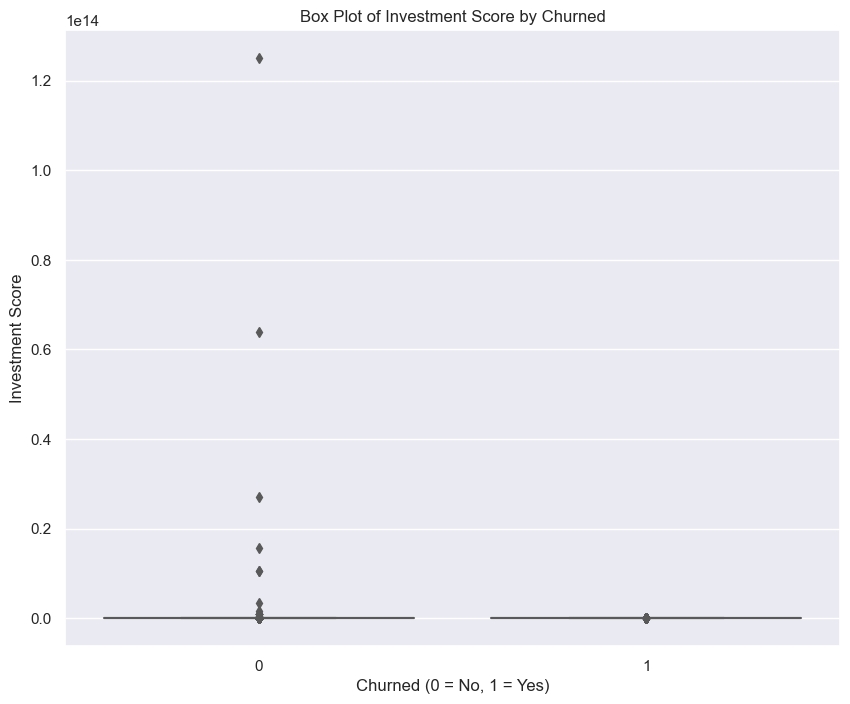

In [635]:
sns.boxplot(x="churned", y="investment_score", data=churned_df, palette="Set2")
plt.title("Box Plot of Investment Score by Churned")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Investment Score")

Text(0, 0.5, 'Average Gap Before Churn')

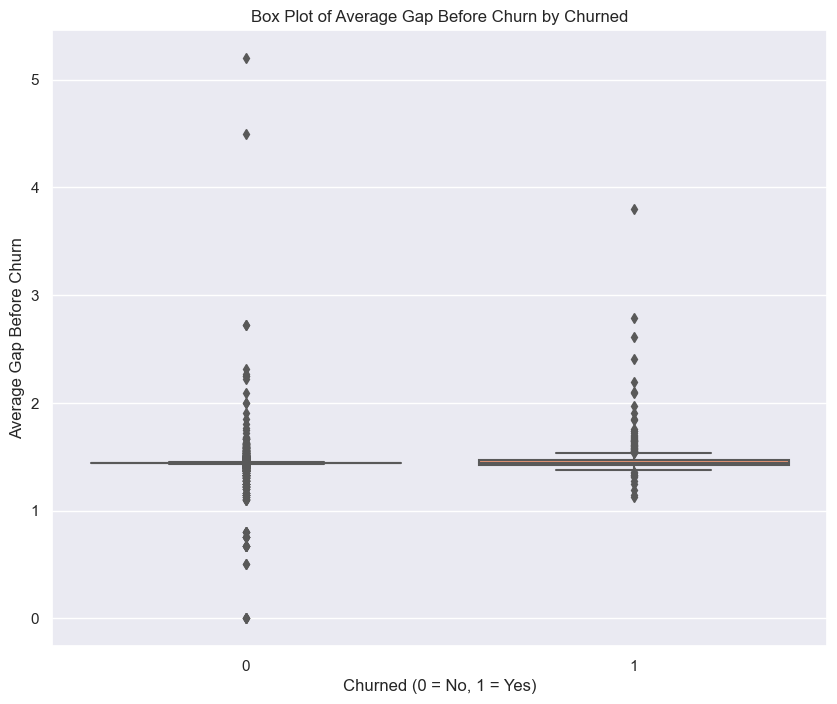

In [636]:
sns.boxplot(x="churned", y="avg_gap_before_churn", data=churned_df, palette="Set2")
plt.title("Box Plot of Average Gap Before Churn by Churned")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Average Gap Before Churn")

Text(0, 0.5, 'Number of times churned')

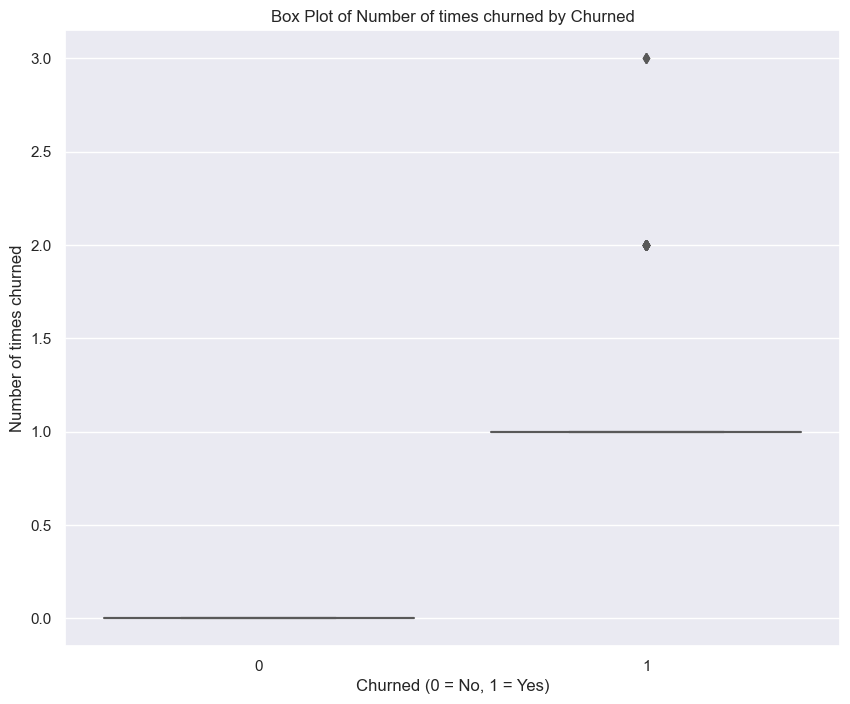

In [637]:
sns.boxplot(x="churned", y="num_of_times_churned", data=churned_df, palette="Set2")
plt.title("Box Plot of Number of times churned by Churned")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Number of times churned")

<h4 style="color:blue;">Building a classifier using the dataset with new features </h4>

<h4 style="color:orange;">Trained Test Split</h4>

In [638]:
from sklearn.model_selection import train_test_split

X = churned_df.drop(['churned','user_id'], axis=1)
y = churned_df['churned']

In [639]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4 style="color:orange;">Log Transformation</h4>

In [640]:
from sklearn.preprocessing import FunctionTransformer

numeric_col = ['first_deposit_amount', 'time_spent', 'investment_score', 'avg_gap_before_churn']
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_train_log_transformed = X_train.copy()
X_test_log_transformed = X_test.copy()

X_train_log_transformed[numeric_col] = log_transformer.fit_transform(X_train[numeric_col])
X_test_log_transformed[numeric_col] = log_transformer.transform(X_test[numeric_col])

<h4 style="color:orange;">Ordinal Encoding</h4>

In [641]:
risk_tolerance_map = {
    'low_risk_tolerance': 0,
    'med_risk_tolerance': 1,
    'high_risk_tolerance': 2
}

investment_experience_map = {
    'no_investment_exp': 0,
    'limited_investment_exp': 1,
    'good_investment_exp': 2,
    'extensive_investment_exp': 3
}

liquidity_needs_map = {
    'not_important_liq_need': 0,
    'somewhat_important_liq_need': 1,
    'very_important_liq_need': 2  
}


for df in [X_train_log_transformed, X_test_log_transformed]:
    df['risk_tolerance'] = df['risk_tolerance'].map(risk_tolerance_map)
    df['investment_experience'] = df['investment_experience'].map(investment_experience_map)
    df['liquidity_needs'] = df['liquidity_needs'].map(liquidity_needs_map)

In [642]:
X_train_log_transformed.head(10)

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,investment_score,avg_gap_before_churn,num_of_times_churned
2103,1,1,2,Android,2.901121,reit,7.824446,3,23.472138,0.895073,0
1905,1,0,2,iOS,0.000000,stock,3.931826,1,3.931826,0.894959,0
1862,2,2,2,Android,3.904664,stock,5.303305,1,5.303305,0.893139,0
3752,2,1,1,iOS,3.780474,etp,6.621406,1,6.621406,0.888639,0
4554,2,1,0,iOS,3.623045,stock,5.707110,1,5.707110,0.893168,0
4002,2,1,1,iOS,1.865485,stock,6.908755,3,20.723266,0.883501,0
2195,1,1,2,iOS,0.000000,stock,4.615121,2,9.210440,0.893818,0
5389,1,0,2,iOS,0.000000,stock,3.931826,3,11.736077,0.893818,0
4772,1,0,2,both,0.000000,stock,7.313887,1,7.313887,0.893818,0
1599,2,2,2,iOS,0.000000,stock,3.258097,3,9.656691,0.893818,0


<h4 style="color:orange;">One Hot Encoding</h4>

In [643]:
categorical_columns = [
    'platform',
    'instrument_type_first_traded',
]

X_train_dummies = pd.get_dummies(X_train_log_transformed, columns=categorical_columns, drop_first=True)
X_test_dummies = pd.get_dummies(X_test_log_transformed, columns=categorical_columns, drop_first=True)

X_train_final, X_test_final = X_train_dummies.align(X_test_dummies, join='left', axis=1, fill_value=0)

<h4 style="color:orange;">Using SMOTE</h4>

In [644]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [645]:
rf.fit(X_train_bal, y_train_bal)
predictions = rf.predict(X_test_final)
print(classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1054
           1       0.07      0.19      0.11        63

    accuracy                           0.82      1117
   macro avg       0.51      0.52      0.50      1117
weighted avg       0.90      0.82      0.86      1117



In [646]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train_bal.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)


print(feature_importance_df)

                                  feature  importance
8                    num_of_times_churned    0.756297
7                    avg_gap_before_churn    0.102495
4                    first_deposit_amount    0.028926
0                          risk_tolerance    0.027200
3                              time_spent    0.018939
6                        investment_score    0.017036
1                   investment_experience    0.010714
18     instrument_type_first_traded_stock    0.010677
2                         liquidity_needs    0.006961
9                           platform_both    0.006036
10                           platform_iOS    0.005359
5                            time_horizon    0.003483
13       instrument_type_first_traded_etp    0.002654
11       instrument_type_first_traded_adr    0.001832
12       instrument_type_first_traded_cef    0.000485
15       instrument_type_first_traded_mlp    0.000426
16      instrument_type_first_traded_reit    0.000181
20       instrument_type_fir

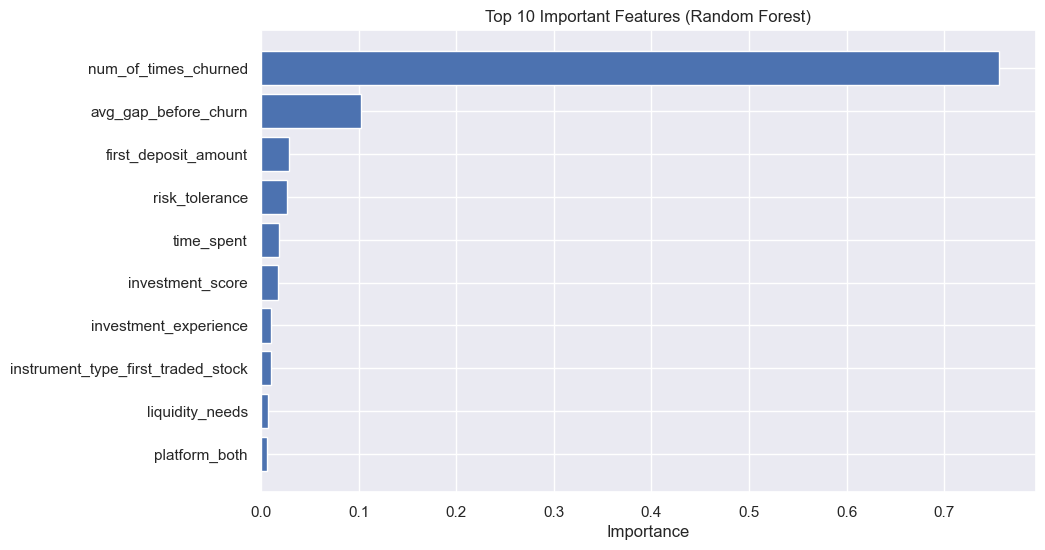

In [647]:
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:top_n], feature_importance_df['importance'][:top_n])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

In [648]:
top_10_features = feature_importance_df['feature'].head(10).tolist()
print("Top 10 features:", top_10_features)

X_train_top10 = X_train_bal[top_10_features]
X_test_top10 = X_test_final[top_10_features]


rf_top10 =  RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf_top10.fit(X_train_top10, y_train_bal)


y_pred = rf_top10.predict(X_test_top10)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Top 10 features: ['num_of_times_churned', 'avg_gap_before_churn', 'first_deposit_amount', 'risk_tolerance', 'time_spent', 'investment_score', 'investment_experience', 'instrument_type_first_traded_stock', 'liquidity_needs', 'platform_both']
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1054
           1       1.00      1.00      1.00        63

    accuracy                           1.00      1117
   macro avg       1.00      1.00      1.00      1117
weighted avg       1.00      1.00      1.00      1117

